In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.impute import SimpleImputer

Membaca dffish dari file Excel

In [2]:
dffish = pd.read_csv('fish_data.csv')
dffish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [3]:
dffish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
dffish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


mengetahui jumlah label dan  apa aja labelnya + type data

In [5]:
pd.unique(dffish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

mengetahui jumlah data yang dari setiap label

In [6]:
dffish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

Memeriksa missing values

In [7]:
# Check for missing values and handle them
if dffish.isnull().sum().sum() > 0:
    print("Terdapat missing values, melakukan imputasi...")
    imputer = SimpleImputer(strategy='mean')  # Imputasi menggunakan rata-rata
    dffish = pd.DataFrame(imputer.fit_transform(dffish), columns=dffish.columns)
else:
    print("Tidak ada missing values.")

Tidak ada missing values.


Memisahkan antara independen dan dependen

In [8]:
x = dffish.drop(columns=['species'])
y = dffish['species']

In [9]:
x

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31
...,...,...,...
4075,30.56,6.12,0.20
4076,29.66,6.11,0.21
4077,32.81,6.25,0.19
4078,29.78,6.11,0.21


In [10]:
y

0          Anabas testudineus
1          Anabas testudineus
2          Anabas testudineus
3          Anabas testudineus
4          Anabas testudineus
                ...          
4075    Sillaginopsis panijus
4076    Sillaginopsis panijus
4077    Sillaginopsis panijus
4078    Sillaginopsis panijus
4079    Sillaginopsis panijus
Name: species, Length: 4080, dtype: object

Encoding label jika diperlukan & Ubah dengan nama kolom target

In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, ..., 8, 8, 8])

Visualisasi dffish

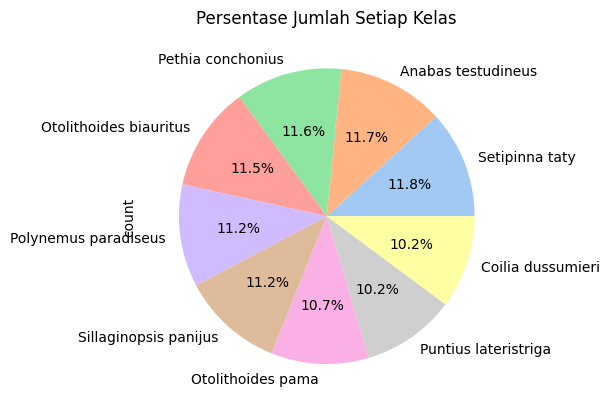

In [12]:
sns.set_palette('pastel')
dffish['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Persentase Jumlah Setiap Kelas")
plt.show()

Split dffish untuk training dan testing

In [13]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [14]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_val = scaler.transform(X_val)          # Only transform on validation data
X_test = scaler.transform(X_test)        # Only transform on test data

In [15]:
# Define a more comprehensive parameter grid
param_grid = {
    'hidden_layer_sizes': [(100, 50, 30), (150, 100, 50), (200, 150, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.005, 0.01],
    'alpha': [0.0001, 0.001],  # L2 regularization
    'max_iter': [1000, 2000, 3000]
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=0)


In [16]:
# Use GridSearchCV for extensive parameter tuning
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 30), learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   1.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 30), learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 30), learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 30), learning_rate_init=0.001, max_iter=2000, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 30), learning_rate_init=0.001, max_iter=2000, solver=adam; total time=   1.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50, 30), learning_rate_init=0.001, max_iter=2000, solver=adam; total time=   2.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_si

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(100, 50, 30), (150, 100, 50),
                                                (200, 150, 100)],
                         'learning_rate_init': [0.001, 0.005, 0.01],
                         'max_iter': [1000, 2000, 3000], 'solver': ['adam']},
             scoring='accuracy', verbose=2)

In [17]:
# Extract the best model
best_model = grid_search.best_estimator_

Menghitung prediksi

In [18]:
# Evaluate on validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

In [19]:
# Evaluate on test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [20]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate_init': 0.005, 'max_iter': 1000, 'solver': 'adam'}
Validation Accuracy: 93.46%
Test Accuracy: 92.16%


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        65
           2       0.67      0.72      0.69        75
           3       1.00      1.00      1.00        48
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        52
           7       0.72      0.67      0.69        81
           8       1.00      1.00      1.00        73

    accuracy                           0.92       612
   macro avg       0.93      0.93      0.93       612
weighted avg       0.92      0.92      0.92       612

Akurasi Model: 92.16%


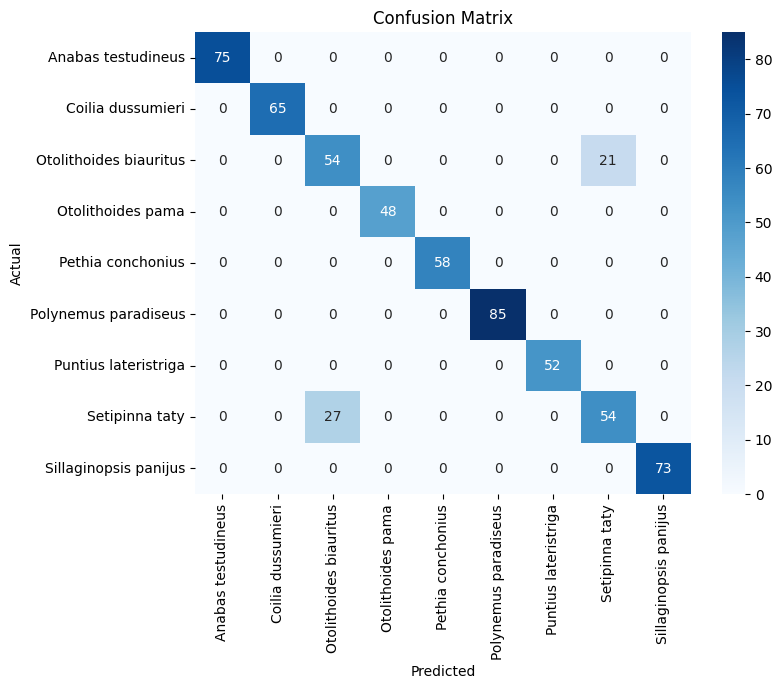

In [21]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
# Akurasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Menyimpan model, scaler, dan encoder menggunakan pickle

In [22]:
# Menyimpan model, scaler, dan encoder menggunakan pickle
with open('perceptron_fish.pkl', 'wb') as model_file:
    pickle.dump(grid_search, model_file)
with open('scaler_fish_Perseptron.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
with open('label_encoder_fish_Perseptron.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

In [23]:
# Memuat kembali model, scaler, dan encoder menggunakan pickle
with open('perceptron_fish.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('scaler_fish_Perseptron.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)
with open('label_encoder_fish_Perseptron.pkl', 'rb') as encoder_file:
    encoder = pickle.load(encoder_file)

Fungsi untuk menguji dffish baru

In [24]:
def test_new_dffish(new_dffish):
    # Pastikan kolom dffish baru sesuai
    required_columns = ['length','weight','w_l_ratio']
    if not all(col in new_dffish.columns for col in required_columns):
        raise ValueError(f"dffish baru harus memiliki kolom: {required_columns}")
    # Skala dffish baru
    new_dffish_scaled = scaler.transform(new_dffish)
    # Prediksi
    predictions = grid_search.predict(new_dffish_scaled)
    return encoder.inverse_transform(predictions)

In [25]:
# Contoh data baru untuk diuji
new_data = pd.DataFrame({
    'length': [5.5, 6.3],
    'weight': [120, 150],
    'w_l_ratio': [200, 180]   		
})

print("Prediksi untuk data baru:")
try:
    predictions = test_new_dffish(new_data)
    print(predictions)
except ValueError as e:
    print(f"Error: {e}")

Prediksi untuk data baru:
['Pethia conchonius' 'Pethia conchonius']
